In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.decomposition import LatentDirichletAllocation

import os 

In [85]:
url = '../data/wikispeedia_paths-and-graph/paths_finished.tsv'
name = ['hashedIpAddress','timestamp','durationInSec','path','rating']
raw_data = pd.read_csv(url,skiprows=15,sep='\t',header=None,names=name)
raw_data.drop(['hashedIpAddress','timestamp'], axis=1, inplace=True)
#drop 

In [86]:
raw_data.head()

,durationInSec,path,rating
0,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [483]:
raw_data.head()

,durationInSec,path,rating
0,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [484]:
source_cat = []
target_cat = []
len_path = []

for row in raw_data['path']:
    source_cat.append(row.rsplit(';')[0])
    target_cat.append(row.rsplit(';')[-1])
    len_path.append(len(row.rsplit(';')))

raw_data['source_cat'] = source_cat
raw_data['target_cat'] = target_cat
raw_data['len_path'] = len_path

In [487]:
raw_data

,durationInSec,path,rating,source_cat,target_cat,len_path
0,166,14th_century;15th_century;16th_century;Pacific...,NaN,14th_century,African_slave_trade,9
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,14th_century,African_slave_trade,5
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,14th_century,African_slave_trade,8
3,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,14th_century,Greece,4
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,14th_century,John_F._Kennedy,7
5,110,14th_century;Europe;North_America;United_State...,NaN,14th_century,John_F._Kennedy,6
6,112,14th_century;China;Gunpowder;Fire,2.0,14th_century,Fire,4
7,139,14th_century;Time;Isaac_Newton;Light;Color;Rai...,1.0,14th_century,Rainbow,6
8,74,14th_century;Time;Light;Rainbow,3.0,14th_century,Rainbow,4
9,167,14th_century;15th_century;Plato;Nature;Ultravi...,NaN,14th_century,Rainbow,7


In [278]:
url_complete = []

#creates list of all the urls for each txt file
for file in os.listdir('./data/plaintext_articles/'):
    if 'txt' in file:
        url_complete.append(os.path.join('./data/plaintext_articles/',file))

text_complete = []

#creates a list where each value is a string of the text file of each url (format needed for count vectorizer)
for url in url_complete:
    file = open(url,"r")
    read_file = file.read()
    read_file = read_file.replace("\n"," ")
    read_file = read_file.replace("wikipedia"," ")
    text_complete.append(read_file)
    


## Latent Dirchilet Allocation model
### clustering and topic modeling







In [92]:
#create a bag of word representation

#To-DO
#clean up so there are no numbers or wikipedia

vect = CountVectorizer(stop_words='english', min_df = 5)

#creates an array
X_vec = vect.fit_transform(text_complete)

#creates vocabulary
#print(vect.get_feature_names())


KeyboardInterrupt: 

In [ ]:
vect_tf = TfidfVectorizer(stop_words='english', min_df = 2)
X_vec_tf = vect_tf.fit_transform(text_complete)
feature_names_tf = np.array(vect_tf.get_feature_names())


In [228]:
#plotting functions
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")
    
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [280]:
#create LDA model
lda = LatentDirichletAllocation(n_topics=15, learning_method="batch",
                                random_state=0)
X_lda = lda.fit_transform(X_vec)

In [414]:
print(X_vec.shape)
print(lda.components_.shape)

(4604, 51732)
(15, 51732)


In [91]:
#graph out most important words for each topic
n_components = 15
feature_names = np.array(vect.get_feature_names())
fig, axes = plt.subplots(n_components // 3, 3, figsize=(15, 15))


for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

plt.savefig('plots/lda_results.png')


NameError: name 'vect' is not defined

In [369]:
#for tfidf vectorizer

# fig, axes = plt.subplots(n_components // 3, 3, figsize=(15, 15))


# for ax, coef in zip(axes.ravel(), lda.components_):
#     plot_important_features(coef, feature_names_tf, top_n=20, ax=ax)
    
# plt.tight_layout()




In [257]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
n_top_words = 20
feature_names = vect.get_feature_names()

print_top_words(lda, feature_names, n_top_words)


Topic #0:
film series time new team united 2006 world year years won later played game 2005 television best season final said
Topic #1:
species wikipedia years north enlarge south known large africa area 000 northern river water org region sea southern long period
Topic #2:
island lake sea islands river water south enlarge ships wikipedia area north ship bridge new great canal time ocean japanese
Topic #3:
disease blood people jewish dna cell brain cells human open treatment research game symptoms jews genetic patients known common children
Topic #4:
used use number time example called using set systems different numbers computer century modern known right form chinese usually theory
Topic #5:
language english new used album wikipedia band time version use languages music released art windows work like words song number
Topic #6:
music century social political human law state rights world people society states work modern theory philosophy new culture popular example
Topic #7:
god life

In [269]:
feature_names_tf = np.array(vect_tf.get_feature_names())
print_top_words(lda, feature_names, n_top_words)


Topic #0:
kidder endosymbionts galilee helots chrononauts involvements ssn horseless pirotechnia glyderau tarlton sudamericana edification unwieldy bazaar gallantry qft countersigned fiscally sodomized
Topic #1:
coral paraphrase oppress feinberg animistic digestion marchal peloponessus rollback boost melody triceratops asks banged minefields arkansas solid coated albiceps entrepreneurship
Topic #2:
fisherwoman crash lemesos acess wombles wyatville kompa ranson katya kell functionally hotter sentimentality levu peppery puny panamanians tajik cognitively ghouls
Topic #3:
southerly generating bipedal edwy shaab biotic philosophical ani chokepoint binap styrian negrete shaak lillehammer avenir claremont inkers breasts grebe connubii
Topic #4:
mocks ishak electoral atlanticus kingsway chiquita pentaquarks completed swe isha cheddi spreadsheets overlooking neretva snare goslings mla synagogue allotting sidewinder
Topic #5:
guerreiro lane recovered peculiar carcharodon palatalized cimarosa an

In [480]:
##see actual top level categories 

url_cat = 'data/wikispeedia_paths-and-graph/categories.tsv'
data_cat = pd.read_csv(url_cat,skiprows=12,sep='\t',header=None,names=['text','subject'])

data_subject = data_cat['subject'].str.split('.', expand=True)

full_data = pd.concat([data_cat,data_subject], axis=1)

full_data.head()



,text,subject,0,1,2,3
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,subject,History,British_History,British_History_1500_and_before_including_Roma...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,subject,People,Historical_figures,None
2,%C3%85land,subject.Countries,subject,Countries,None,None
3,%C3%85land,subject.Geography.European_Geography.European_...,subject,Geography,European_Geography,European_Countries
4,%C3%89douard_Manet,subject.People.Artists,subject,People,Artists,None


In [97]:
#histogram of categories
full_data[1].value_counts().plot('bar')


NameError: name 'full_data' is not defined

In [61]:
##LSA Analysis

url_complete = []

#creates list of all the urls for each txt file
for file in os.listdir('./data/plaintext_articles/'):
    if file == 'John_F._Kennedy':
        print('andres pops addy')
    else:
        print(file)
    #elif: 'txt' in file:
    #    url_complete.append(os.path.join('./data/plaintext_articles/',file))

%C3%81ed%C3%A1n_mac_Gabr%C3%A1in.txt
%C3%85land.txt
%C3%89douard_Manet.txt
%C3%89ire.txt
%C3%93engus_I_of_the_Picts.txt
%E2%82%AC2_commemorative_coins.txt
10th_century.txt
11th_century.txt
12th_century.txt
13th_century.txt
14th_century.txt
15th_century.txt
15th_Marine_Expeditionary_Unit.txt
16_Cygni.txt
16_Cygni_Bb.txt
16th_century.txt
1755_Lisbon_earthquake.txt
17th_century.txt
1896_Summer_Olympics.txt
18th_century.txt
1928_Okeechobee_Hurricane.txt
1973_oil_crisis.txt
1980_eruption_of_Mount_St._Helens.txt
1997_Pacific_hurricane_season.txt
19th_century.txt
1_Ceres.txt
1st_century.txt
1st_century_BC.txt
2-6-0.txt
2-8-0.txt
2003_Atlantic_hurricane_season.txt
2004_Atlantic_hurricane_season.txt
2004_Indian_Ocean_earthquake.txt
2005_Atlantic_hurricane_season.txt
2005_Hertfordshire_Oil_Storage_Terminal_fire.txt
2005_Kashmir_earthquake.txt
2005_Lake_Tanganyika_earthquake.txt
2005_Sumatra_earthquake.txt
20th_century.txt
21st_century.txt
2nd_century.txt
3_Juno.txt
3rd_century.txt
4-2-0.txt
4-4-

In [10]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

url_complete = []

#creates list of all the urls for each txt file
for file in os.listdir('../data/plaintext_articles/'):        
    if 'txt' in file:
        url_complete.append(os.path.join('../data/plaintext_articles/',file))

text_complete = []

#creates a list where each value is a string of the text file of each url (format needed for count vectorizer)
for url in url_complete:
    file = open(url,"r")
    read_file = file.read()
    read_file = read_file.replace("\n"," ")
    read_file = read_file.replace("wikipedia"," ")
    text_complete.append(read_file)
 
#create a list of article n
article_names =[]

for i in url_complete:
    article_names.append(i[:-4].rsplit('/')[-1])
    
def create_lsa_matrix(text_complete,article_names):     
    vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
    dtm = vectorizer.fit_transform(text_complete)
    lsa = TruncatedSVD(100, algorithm = "arpack")
    dtm_lsa = lsa.fit_transform(dtm)
    dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
    similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
    similarity_matrix = pd.DataFrame(similarity,index=article_names, columns=article_names)
    return(similarity_matrix)

In [11]:
similarity_matrix = create_lsa_matrix(text_complete,article_names)

In [12]:
similarity_matrix

,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,%C3%85land,%C3%89douard_Manet,%C3%89ire,%C3%93engus_I_of_the_Picts,%E2%82%AC2_commemorative_coins,10th_century,11th_century,12th_century,13th_century,...,Zimbabwe,Zinc,Zinc_chloride,Zion_National_Park,Zionism,Zirconium,Zoroaster,Zuid-Gelders,Zulu,ZX_Spectrum
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,1.000000,0.230876,0.307840,0.612345,0.918589,0.180407,0.463066,0.279409,0.332717,0.444135,...,0.210507,0.176323,0.159476,0.264986,0.126887,0.174947,0.544565,0.129422,0.397121,0.186185
%C3%85land,0.230876,1.000000,0.232039,0.294284,0.274830,0.387129,0.254711,0.116622,0.102700,0.259510,...,0.527607,0.141716,0.169269,0.249298,0.212369,0.185003,0.291251,0.420349,0.448285,0.217420
%C3%89douard_Manet,0.307840,0.232039,1.000000,0.138400,0.337156,0.229846,0.385264,0.177235,0.213152,0.338730,...,0.273323,0.219034,0.185137,0.310632,0.172607,0.229376,0.522760,0.241127,0.330971,0.285922
%C3%89ire,0.612345,0.294284,0.138400,1.000000,0.538139,0.229686,0.188629,0.090270,0.143016,0.143212,...,0.337338,0.176919,0.153874,0.066815,0.161982,0.181161,0.230906,0.122458,0.280258,0.179630
%C3%93engus_I_of_the_Picts,0.918589,0.274830,0.337156,0.538139,1.000000,0.202422,0.535533,0.293312,0.354706,0.418945,...,0.241394,0.152826,0.137225,0.293990,0.155642,0.166017,0.513731,0.111146,0.414484,0.219940
%E2%82%AC2_commemorative_coins,0.180407,0.387129,0.229846,0.229686,0.202422,1.000000,0.207003,0.096961,0.089899,0.170590,...,0.347798,0.167641,0.166929,0.287366,0.141627,0.248883,0.304376,0.307428,0.188208,0.247909
10th_century,0.463066,0.254711,0.385264,0.188629,0.535533,0.207003,1.000000,0.579403,0.549192,0.780396,...,0.265861,0.199142,0.178449,0.224141,0.214237,0.183356,0.561603,0.190879,0.283499,0.169658
11th_century,0.279409,0.116622,0.177235,0.090270,0.293312,0.096961,0.579403,1.000000,0.975838,0.378603,...,0.160979,0.200979,0.086529,0.132197,0.093172,0.108732,0.356700,0.123411,0.182154,0.083249
12th_century,0.332717,0.102700,0.213152,0.143016,0.354706,0.089899,0.549192,0.975838,1.000000,0.366548,...,0.146518,0.198878,0.097074,0.110110,0.097217,0.105461,0.332527,0.104172,0.183085,0.068063
13th_century,0.444135,0.259510,0.338730,0.143212,0.418945,0.170590,0.780396,0.378603,0.366548,1.000000,...,0.252060,0.176869,0.187437,0.189024,0.198309,0.179755,0.505737,0.232287,0.304064,0.151128


In [15]:
url_final = '../task-data/data_with_optimal.csv'
final_data = pd.read_csv(url_final)
final_data.head()

,Unnamed: 0,hashedIpAddress,timestamp,durationInSec,path,rating,pathlength,source,target,source_target,opt_path_length,state2,state3,opt2path_length,opt3path_length
0,0,6a3701d319fc3754,1297740409,166,"['14th_century', '15th_century', '16th_century...",NaN,9,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,15th_century,16th_century,3.0,3.0
1,1,3824310e536af032,1344753412,88,"['14th_century', 'Europe', 'Africa', 'Atlantic...",3.0,5,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Europe,Africa,3.0,2.0
2,2,415612e93584d30e,1349298640,138,"['14th_century', 'Niger', 'Nigeria', 'British_...",NaN,8,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Niger,Nigeria,3.0,2.0
3,3,64dd5cd342e3780c,1265613925,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",NaN,4,14th_century,Greece,14th_century|Greece,2.0,Renaissance,Ancient_Greece,2.0,1.0
4,4,015245d773376aab,1366730828,175,"['14th_century', 'Italy', 'Roman_Catholic_Chur...",3.0,7,14th_century,John_F._Kennedy,14th_century|John_F._Kennedy,3.0,Italy,Roman_Catholic_Church,2.0,2.0


In [16]:
def getSemanticDist(source, target, data):
    return data.loc[source, target]

def rowFunction(row, data=None):
    if data is not None:
        return getSemanticDist(row['source'], row['target'], data)
    
final_data['semantic_length'] = final_data.apply(rowFunction,data=similarity_matrix,axis=1)

In [34]:
final_data

,Unnamed: 0,hashedIpAddress,timestamp,durationInSec,path,rating,pathlength,source,target,source_target,opt_path_length,state2,state3,opt2path_length,opt3path_length,semantic_length
0,0,6a3701d319fc3754,1297740409,166,"['14th_century', '15th_century', '16th_century...",NaN,9,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,15th_century,16th_century,3.0,3.0,0.396819
1,1,3824310e536af032,1344753412,88,"['14th_century', 'Europe', 'Africa', 'Atlantic...",3.0,5,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Europe,Africa,3.0,2.0,0.396819
2,2,415612e93584d30e,1349298640,138,"['14th_century', 'Niger', 'Nigeria', 'British_...",NaN,8,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Niger,Nigeria,3.0,2.0,0.396819
3,3,64dd5cd342e3780c,1265613925,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",NaN,4,14th_century,Greece,14th_century|Greece,2.0,Renaissance,Ancient_Greece,2.0,1.0,0.447861
4,4,015245d773376aab,1366730828,175,"['14th_century', 'Italy', 'Roman_Catholic_Chur...",3.0,7,14th_century,John_F._Kennedy,14th_century|John_F._Kennedy,3.0,Italy,Roman_Catholic_Church,2.0,2.0,0.274103
5,5,5295bca242be81fe,1372890414,110,"['14th_century', 'Europe', 'North_America', 'U...",NaN,6,14th_century,John_F._Kennedy,14th_century|John_F._Kennedy,3.0,Europe,North_America,2.0,2.0,0.274103
6,6,36dabfa133b20e3c,1249525912,112,"['14th_century', 'China', 'Gunpowder', 'Fire']",2.0,4,14th_century,Fire,14th_century|Fire,3.0,China,Gunpowder,2.0,1.0,0.327777
7,7,20418ff4797f96be,1229188046,139,"['14th_century', 'Time', 'Isaac_Newton', 'Ligh...",1.0,6,14th_century,Rainbow,14th_century|Rainbow,3.0,Time,Isaac_Newton,2.0,1.0,0.283387
8,8,08888b1b428dd90e,1232241510,74,"['14th_century', 'Time', 'Light', 'Rainbow']",3.0,4,14th_century,Rainbow,14th_century|Rainbow,3.0,Time,Light,2.0,1.0,0.283387
9,9,08888b1b428dd90e,1232241601,167,"['14th_century', '15th_century', 'Plato', 'Nat...",NaN,7,14th_century,Rainbow,14th_century|Rainbow,3.0,15th_century,Plato,2.0,3.0,0.283387


In [ ]:
#final_data.to_csv("../task-data/data_with_semantics_all_columns_100d.csv")

In [55]:
new_data = pd.read_csv("../task-data/data_with_semantics_all_columns_100d.csv")


opt_path_length
0.0    0.332069
1.0    0.564092
2.0    0.292102
3.0    0.275936
4.0    0.251526
5.0    0.253030
6.0    0.250088
Name: semantic_length, dtype: float64

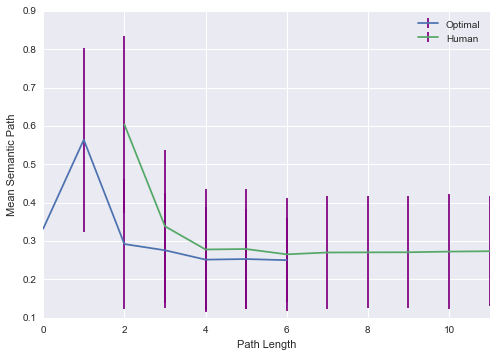

In [96]:
fig, ax = plt.subplots()

new_data.groupby(['opt_path_length']).mean()['semantic_length'].plot(label='Optimal',yerr=new_data.groupby(['opt_path_length']).std()['semantic_length'],ecolor='purple')

new_data.groupby(['pathlength']).mean()['semantic_length'][0:10].plot(label='Human',yerr= new_data.groupby(['pathlength']).std()['semantic_length'][0:10],ecolor='purple')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.set_xlabel('Path Length')
ax.set_ylabel('Mean Semantic Path')

plt.savefig('../plots/meansempath_vs_topopath.png')


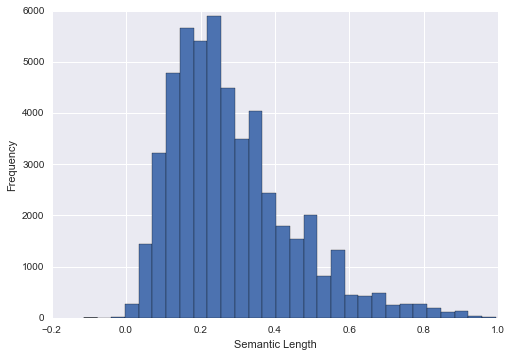

In [95]:
fig, ax = plt.subplots()

final_data['semantic_length'].hist(bins=30)
ax.set_xlabel('Semantic Length')
ax.set_ylabel('Frequency')

plt.savefig('../plots/semanticlength_hist.png')